<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Multi_Regression(Startups)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path =("/content/50_Startups.csv")
data=pd.read_csv(path)
data.head()
# encodings = ['utf-8', 'latin1', 'iso-8859-1']
# for encoding in encodings:
#     try:
#         data = pd.read_csv(path, encoding=encoding)
#         # If reading succeeds without raising an error, break the loop
#         break
#     except UnicodeDecodeError:
#         print(f"Failed to read with encoding '{encoding}'")
#         continue

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
print(data.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,4]

In [4]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [5]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [6]:
!pip install scikit-learn


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder_State =LabelEncoder()
X.iloc[:,3]=labelencoder_State.fit_transform(X.iloc[:,3])


In [8]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))


In [10]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)


In [12]:
X_train

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.5493950e+04,
        1.0305749e+05, 2.1463481e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.6014020e+04,
        8.5047440e+04, 2.0551764e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.5328870e+04,
        1.4413598e+05, 1.3405007e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6426070e+04,
        1.5769392e+05, 2.1079767e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 9.1749160e+04,
        1.1417579e+05, 2.9491957e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1994324e+05,
        1.5654742e+05, 2.5651292e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0002300e+03,
        1.2415304e+05, 1.9039300e+03],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 5.4205000e+02,
        5.1743150e+04, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00,

In [13]:
X_test

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.6051520e+04,
        1.8264556e+05, 1.1814820e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0067196e+05,
        9.1790610e+04, 2.4974455e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0191308e+05,
        1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.2107600e+04,
        1.2786455e+05, 3.5318381e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0229590e+04,
        6.5947930e+04, 1.8526510e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.1136380e+04,
        1.5270192e+05, 8.8218230e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.3994560e+04,
        1.2278275e+05, 3.0331926e+05],
       [0.0000000e+00, 1.0000000e+00,

In [14]:
y_train

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [15]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [17]:
y_pred=regressor.predict(X_test)
y_pred


array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [18]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X, axis=1)
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.6534920e+05, 1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.6259770e+05, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.5344151e+05, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4437241e+05, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4210734e+05, 9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3187690e+05, 9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3461546e+05, 1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.3029813e+05, 1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0

In [19]:
X_opt=X[:,[0,1,2,3,4,5]]
X_opt=np.array(X_opt,dtype=float)


In [20]:
import statsmodels.api as sm

# Create the OLS model
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

# Summarize the results
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 11 May 2024   Prob (F-statistic):           2.90e-28
Time:                        06:08:43   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
x1          1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
x2          1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
x3          1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     3.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
X_opt=X[:,[0,1,3,4,5]]
X_opt=np.array(X_opt,dtype=float)
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 11 May 2024   Prob (F-statistic):           2.90e-28
Time:                        06:08:43   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.57e+04   6502.532      8.565      0.000    4.26e+04    6.88e+04
x1         -1091.1075   3377.087     -0.323      0.748   -7892.910    5710.695
x2         -1130.4509   3344.220     -0.338      0.737   -7866.055    5605.154
x3             0.8609      0.031     27.665      0.000       0.798       0.924
x4            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     7.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_opt=X[:,[0,3,4,5]]
X_opt=np.array(X_opt,dtype=float)
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sat, 11 May 2024   Prob (F-statistic):           1.68e-29
Time:                        06:08:43   Log-Likelihood:                -526.81
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.507e+04   6145.947      8.960      0.000    4.27e+04    6.74e+04
x1          -573.7029   2838.043     -0.202      0.841   -6286.386    5138.981
x2             0.8624      0.030     28.282      0.000       0.801       0.924
x3            -0.0530      0.050     -1.063      0.294      -0.154       0.047
==============================================================================
Omnibus:                       14.902   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.212
Skew:                          -0.964   Prob(JB):                     2.48e-05
Kurtosis:                       5.543   Cond. No.                     6.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:

X_opt=X[:,[0,3,5]]
X_opt=np.array(X_opt,dtype=float)
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.372
Time:                        06:08:43   Log-Likelihood:                -599.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.613e+04   2.59e+04      2.942      0.005    2.41e+04    1.28e+05
x1          2555.2116    1.2e+04      0.212      0.833   -2.16e+04    2.68e+04
x2             0.2885      0.205      1.404      0.167      -0.125       0.702
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.139
Skew:                           0.099   Prob(JB):                        0.933
Kurtosis:                       2.835   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_opt=X[:,[0,3]]
X_opt=np.array(X_opt,dtype=float)
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.829
Time:                        06:08:43   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
x1          2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

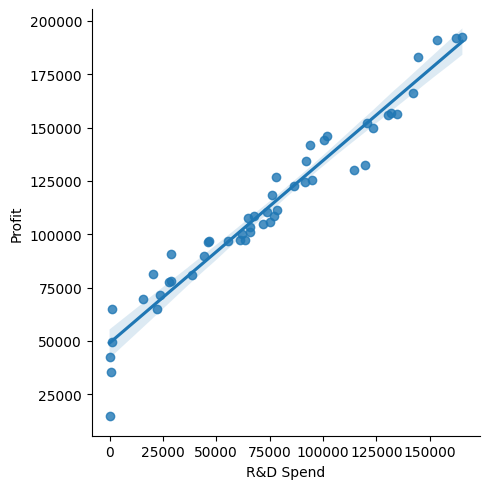

In [25]:
import seaborn as sns
sns.lmplot(x='R&D Spend',y="Profit",data=data)
plt.show()